# Solution : Prédiction prix de vente de voitures

In [2]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 99

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower',
        'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# Sélection des colonnes numériques et continues - à partir de la documentation

continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width',
                          'height', 'curb-weight', 'bore', 'stroke', 'compression-rate',
                          'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

numeric_cars = cars[continuous_values_cols]

numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


## Nettoyage de données

In [4]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [7]:
# Remplacer les valeurs manquantes dans d'autres colonnes en utilisant la moyenne.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [8]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
# Normaliser toutes les colonnes de sorte que les valeurs soient comprises entre 0 et 1 sauf pour la colonne cible.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Modèle univarié

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(0)
    
    # Randomiser l'ordre des lignes du DataFrame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Diviser le nombre de lignes de moitié.
    last_train_row = int(len(rand_df) / 2)
    
    # Sélectionner la première moitié en set de training.
    # Sélectionner la seconde moitié en set de test.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]

    # Ajuster un modèle KNN utilisant la valeur par défaut k.
    knn.fit(train_df[[train_col]], train_df[target_col])

    # faire des prédictions en utilisant ce modèle.
    predicted_labels = knn.predict(test_df[[train_col]])
    
    # Calculer et retourner la valeur RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    
    return rmse

In [11]:
rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# Pour chaque colonne (excepté 'price'), entrainer un modèle et retourner la valeur RMSE.
# et ajouter cette valeur au dictionnaire 'rmse_results'.

for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

# Créer un objet Series depuis le dictionnaire
# ainsi nous pouvons facilement voir les résultats, les trier, etc…
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

curb-weight          3782.517763
highway-mpg          3825.547853
width                4067.565225
city-mpg             4998.578075
horsepower           5015.709416
length               5722.180847
compression-rate     6038.443497
wheel-base           6212.244807
bore                 6375.811122
peak-rpm             6794.853225
normalized-losses    6924.767940
stroke               7142.509829
height               7502.274571
dtype: float64

In [12]:
def knn_train_test2(train_col, target_col, df):
    np.random.seed(0)
    
    # Randomiser l'ordre des lignes du DataFrame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Diviser le nombre de lignes de moitié.
    last_train_row = int(len(rand_df) / 2)

    # Sélectionner la première moitié en set de training.
    # Sélectionner la seconde moitié en set de test.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Ajuster un modèle KNN utilisant la valeur de k en paramètre.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        
        # faire des prédictions en utilisant ce modèle.
        predicted_labels = knn.predict(test_df[[train_col]])
        
        # Calculer et retourner la valeur RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

In [13]:
feature_k_rmse_results = {}

# Pour chaque colonne (excepté 'price'), entrainer un modèle et retourner la valeur RMSE.
# et ajouter cette valeur au dictionnaire 'rmse_results'.
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test2(col, 'price', numeric_cars)
    feature_k_rmse_results[col] = rmse_val
    
feature_k_rmse_results

{'normalized-losses': {1: 6057.52518004925,
  3: 6596.095787097338,
  5: 6924.76793960821,
  7: 7120.228738952779,
  9: 7348.920309861463},
 'wheel-base': {1: 6489.446552245842,
  3: 7421.60506986065,
  5: 6212.244806719536,
  7: 5535.76531607633,
  9: 5371.936991061691},
 'length': {1: 5363.785887738711,
  3: 5439.629108825727,
  5: 5722.180847429856,
  7: 5505.055596543468,
  9: 5374.873583649679},
 'width': {1: 5024.170730056103,
  3: 4016.109122664437,
  5: 4067.565225215957,
  7: 3936.4615790306507,
  9: 3901.112782786038},
 'height': {1: 9700.940304531268,
  3: 7730.8348247074,
  5: 7502.274571339172,
  7: 7222.73929030589,
  9: 7315.274681434262},
 'curb-weight': {1: 5939.546599024222,
  3: 4283.684945437885,
  5: 3782.5177631983297,
  7: 3714.987693076389,
  9: 4083.4923545066504},
 'bore': {1: 6081.76044162436,
  3: 6163.478121519979,
  5: 6375.811122244342,
  7: 6536.5047058075515,
  9: 6380.249791076251},
 'stroke': {1: 7352.975377423081,
  3: 6837.7399425945005,
  5: 7142.5

normalized-losses
average_rmse: 6809.507591113807
wheel-base
average_rmse: 6206.19974719281
length
average_rmse: 5481.105004837487
width
average_rmse: 4189.083887950638
height
average_rmse: 7894.412734463598
curb-weight
average_rmse: 4360.845871048696
bore
average_rmse: 6307.560836454496
stroke
average_rmse: 7105.977198596486
compression-rate
average_rmse: 6628.768853554623
horsepower
average_rmse: 4907.446259811364
peak-rpm
average_rmse: 7051.92722210883
city-mpg
average_rmse: 4638.434400354712
highway-mpg
average_rmse: 4170.291993746854


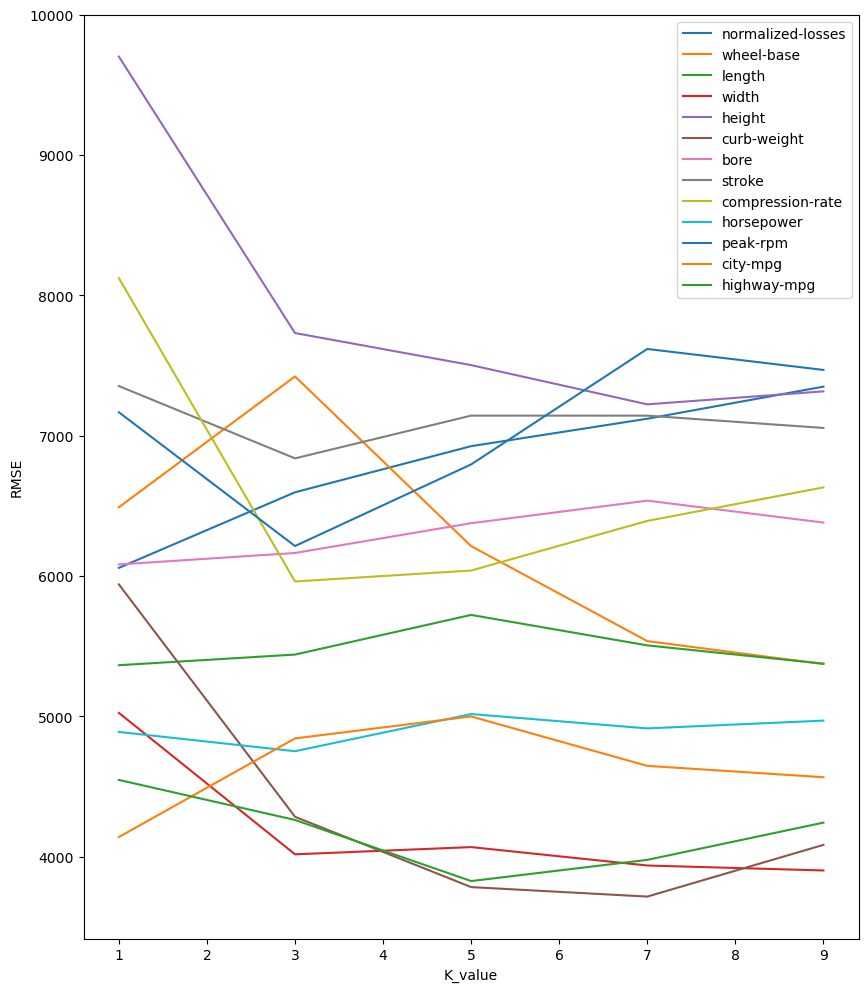

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

best_features = {}
plt.figure(figsize=(10, 12))

for key, value in feature_k_rmse_results.items():
    x = list(value.keys())
    y = list(value.values())
    
    order = np.argsort(x)
    x_ordered = np.array(x)[order]
    y_ordered = np.array(y)[order]
    print(key)
    print('average_rmse: '+str(np.mean(y)))
    best_features[key] = np.mean(y)

    plt.plot(x_ordered, y_ordered, label=key)
    plt.xlabel("K_value")
    plt.ylabel("RMSE")
plt.legend()
plt.show()

In [15]:
sorted_features_list = sorted(best_features, key=best_features.get)
sorted_features_list

['highway-mpg',
 'width',
 'curb-weight',
 'city-mpg',
 'horsepower',
 'length',
 'wheel-base',
 'bore',
 'compression-rate',
 'normalized-losses',
 'peak-rpm',
 'stroke',
 'height']

## Modèle multivarié

In [16]:
def knn_train_test3(train_cols, target_col, df):
    np.random.seed(0)
    
    # Randomise l'ordre des lignes du DataFrame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Diviser le nombre de lignes de moitié.
    last_train_row = int(len(rand_df) / 2)
    
    # Sélectionner la première moitié pour le set de training.
    # Sélectionner la seconde moitié pour le set de test.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Ajuster le modèle en utilisant la valeur k.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        # Faire des prédictions en utilisant le modèle.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculer et retourner la valeur RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
        
    return k_rmses

In [17]:
k_rmse_features ={}

best_two_features = sorted_features_list[0:2]
best_three_features = sorted_features_list[0:3]
best_four_features = sorted_features_list[0:4]
best_five_features = sorted_features_list[0:5]
best_six_features = sorted_features_list[0:6]


k_rmse_features["best_two_rmse"]  = knn_train_test3(best_two_features, 'price', numeric_cars)
k_rmse_features["best_three_rmse"] = knn_train_test3(best_three_features, 'price', numeric_cars)
k_rmse_features["best_four_rmse"] = knn_train_test3(best_four_features, 'price', numeric_cars)
k_rmse_features["best_five_rmse"] = knn_train_test3(best_five_features, 'price', numeric_cars)
k_rmse_features["best_six_rmse"] = knn_train_test3(best_six_features, 'price', numeric_cars)

k_rmse_features

{'best_two_rmse': {5: 3943.278611752027},
 'best_three_rmse': {5: 3495.623297555937},
 'best_four_rmse': {5: 3499.789211530962},
 'best_five_rmse': {5: 3486.5563456917153},
 'best_six_rmse': {5: 3589.5723535797633}}

## Variation des hyper paramètres

In [23]:
def knn_train_test4(train_cols, target_col, df):
    np.random.seed(0)
    
    # Randomise l'ordre des lignes du DataFrame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Diviser le nombre de lignes de moitié.
    last_train_row = int(len(rand_df) / 2)
    
    # Sélectionner la première moitié pour le set de training.
    # Sélectionner la seconde moitié pour le set de test.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Ajuster le modèle en utilisant la valeur k.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        # Faire des prédictions en utilisant le modèle.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculer et retourner la valeur RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
        
    return k_rmses

In [24]:
features = [best_three_features, best_four_features, best_five_features]
k_rmse_results = {}
k_rmse_results["best_three_features"] = knn_train_test4(best_three_features, 'price', numeric_cars)
# k_rmse_results["best_four_features"] = knn_train_test4(best_four_features, 'price', numeric_cars)
# k_rmse_results["best_five_features"] = knn_train_test4(best_five_features, 'price', numeric_cars)

k_rmse_results

{'best_three_features': {1: 4394.548881431077,
  2: 4012.0099191781865,
  3: 3701.833701947683,
  4: 3363.910603949128,
  5: 3495.623297555937,
  6: 3598.949475473044,
  7: 3537.3016311966785,
  8: 3676.7657541501185,
  9: 3743.2253449247723,
  10: 3879.513773325949,
  11: 4072.203631742671,
  12: 4152.793042259954,
  13: 4213.071707271992,
  14: 4172.301649643432,
  15: 4222.848680728453,
  16: 4213.672852924302,
  17: 4217.708194667094,
  18: 4192.358069141822,
  19: 4216.682906853658,
  20: 4294.600926122643,
  21: 4341.440754567459,
  22: 4376.278394074132,
  23: 4397.879066167476,
  24: 4392.677964811508}}

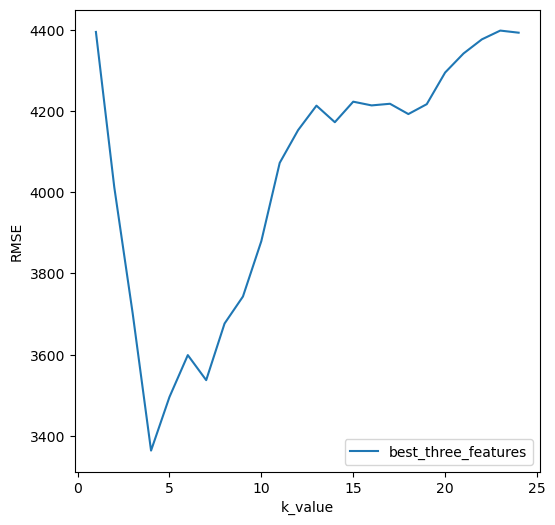

In [25]:
plt.figure(figsize=(6, 6))

for key, value in k_rmse_results.items():
    
    x = list(value.keys())
    y = list(value.values())
    plt.plot(x, y, label=key)
    plt.xlabel("k_value")
    plt.ylabel("RMSE")
    
plt.legend()
plt.show()